# Imaging
Run the following hidden cells for preparing the code environment

In [1]:
%pylab inline
from tqdm.notebook import tqdm as tqdm
from ipyfilechooser import FileChooser
from pathlib import Path
import h5py
import os
import ttp


Populating the interactive namespace from numpy and matplotlib


In [2]:
#%% Plot Config

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIG_SIZE = 22
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIG_SIZE)       # fontsize of the axes title
plt.rc('axes', labelsize=BIG_SIZE)       # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
matplotlib.rcParams['figure.figsize'] = (13.0, 10.0)

# Select Data

In [3]:
fc = FileChooser()
fc.default_path='/home/labuser/myDev/timetaggingplatform/dataReceiver/data'
fc.use_dir_icons = True
display(fc)

FileChooser(path='/home/labuser/myDev/timetaggingplatform/dataReceiver/data', filename='', title='HTML(value='…

In [4]:
filename =  "/mnt/DATA/DataFast/data-1625566656.774000-7x7-512x512x40u.ttp"

# Specify parameters

In [5]:
sysclk_MHz=240.  # FPGA system clock (MHz)
laser_MHz=40.    # Laser repetition rate (MHz)
laser_factor=1   # Adimensional number to account for laser actual repetiton frequency
npixel = 512     # Image size (pixels)
dwell_time = 50  # Pixel dwell time (us)
nchannel = 21    # Number of active channels
kC4=43           # Time width of TCSPC histogram bin (picoseconds)

In [6]:
laser_MHz=laser_MHz*laser_factor
laser_Hz=laser_MHz*10**6
max_counter=2**16-1
sysclk_ps=1000000./sysclk_MHz #ps
print("SysClk ps:", sysclk_ps)
laser_ps=1000000./laser_MHz #ps
print("LaserClk ps:", laser_ps)
ratio=sysclk_MHz/laser_MHz
sysclk_ps=1e6/sysclk_MHz
laser_ps=1e6/laser_MHz
nbins=int(round(laser_ps/kC4))

SysClk ps: 4166.666666666667
LaserClk ps: 25000.0


# Data conversion to H5 format

In [7]:
myReturn=ttp.convertDataRAW( filenameToRead=filename,
                    sysclk_MHz = sysclk_MHz,
                    laser_MHz=laser_MHz,
                    dwell_time_us=100.,
                    list_of_channels=np.arange(0,nchannel),
                    autoCalibration=True,
                    kC4=45.,
                    textInPlot=None,
                    compressionLevel=1,
                    makePlots=True,
                    ignorePixelLineFrame = False)

/mnt/DATA/DataFast/data-1625566656.774000-7x7-512x512x40u.ttp
**************************
* Size table:  105467406
***************************
Convert to DataFrame
Converted

Calculate rates 
Calculate cumulative step 
Add cumulativeStep
Acquisition lasted:  38.445565279166665 s
Scan_enable 1.0 ratio 9.481602306593186e-09 rate 0.026010802357532035
line_enable 1318.0 ratio 1.249675184008982e-05 rate 34.28223750722722
pixel_enable 524225.0 ratio 0.004970492969173813 rate 13635.51286587723
Laser 56780406.0 ratio 0.5383692284988976 rate 1476903.9182464262
Calculate totalphotons 
kC4<=== 45.0
sysclk_ps<=== 4166.666666666667
kC4<=== 44.80286738351255
Start process
Start analysisForImg


Current frame: 0 	:   2%|▏         | 2109348/105467406 [00:00<00:12, 8426880.26it/s]    

Arrays copied into analysisForImg


Current frame: 1 	: : 106522074it [00:22, 4685269.53it/s]                             

Total Frame: 1


Current frame: 1 	: : 106522074it [00:22, 4681006.28it/s]
  0%|          | 0/21 [00:00<?, ?it/s]

New HDF5 written
cumulative_step        int64
t_L                    uint8
valid_tdc_L            uint8
total_photon           int64
total_photon_laser     uint8
arr_px                uint16
arr_px_corr           uint16
arr_py                uint16
arr_frame             uint16
dtype: object
Start conversion of 0 channel
t_0 valid_tdc_0
..



 98%|█████████▊| 57255912/58424426 [00:01<00:00, 46779696.89it/s]

Data ready, conversion to array
Adding keys to HDF5...  "ch_0"


  5%|▍         | 1/21 [00:17<05:45, 17.28s/it]

t_0      int16
t_L      int16
dS_0    uint16
dtype: object
Start conversion of 1 channel
t_1 valid_tdc_1
..



59008644it [00:13, 46779696.89it/s]                              

  0%|          | 0/58620485 [00:00<?, ?it/s]

 11%|█         | 6448244/58620485 [00:00<00:00, 60750535.95it/s]

 21%|██        | 12310284/58620485 [00:00<00:00, 58966844.40it/s]

 27%|██▋       | 15827508/58620485 [00:00<00:00, 48389640.03it/s]

 35%|███▍      | 20517140/58620485 [00:00<00:00, 46815102.80it/s]

 42%|████▏     | 24620568/58620485 [00:00<00:00, 43757156.52it/s]

 49%|████▉     | 28723996/58620485 [00:00<00:00, 40611410.35it/s]

 57%|█████▋    | 33413628/58620485 [00:00<00:00, 41743040.18it/s]

 64%|██████▍   | 37517056/58620485 [00:00<00:00, 39463540.93it/s]

 72%|███████▏  | 42206688/58620485 [00:00<00:00, 40434054.56it/s]

 81%|████████  | 47482524/58620485 [00:01<00:00, 43100113.80it/s]

 89%|████████▉ | 52172156/58620485 [00:01<00:00, 42756607.30it/s]

 97%|█████████▋| 56861788/58620485 [00:01<00:00, 40985949.16it/s]

Data ready, conversion to array
Adding keys to HDF5...  "ch_1"


 10%|▉         | 2/21 [00:34<05:29, 17.32s/it]

t_1      int16
t_L      int16
dS_1    uint16
dtype: object
Start conversion of 2 channel
t_2 valid_tdc_2
..




59206604it [00:15, 40985949.16it/s]                              


  0%|          | 0/58660115 [00:00<?, ?it/s]


  9%|▉         | 5279409/58660115 [00:00<00:01, 52664810.65it/s]


 15%|█▍        | 8799015/58660115 [00:00<00:01, 45014392.68it/s]


 23%|██▎       | 13491823/58660115 [00:00<00:01, 44580574.91it/s]


 31%|███       | 18184631/58660115 [00:00<00:00, 44179033.77it/s]


 39%|███▉      | 22877439/58660115 [00:00<00:00, 44021057.91it/s]


 47%|████▋     | 27570247/58660115 [00:00<00:00, 43998544.17it/s]


 56%|█████▌    | 32849656/58660115 [00:00<00:00, 46054103.05it/s]


 64%|██████▍   | 37542464/58660115 [00:00<00:00, 42855171.62it/s]


 71%|███████   | 41648671/58660115 [00:00<00:00, 40735479.44it/s]


 80%|███████▉  | 46928080/58660115 [00:01<00:00, 43503805.97it/s]


 89%|████████▉ | 52207489/58660115 [00:01<00:00, 45336352.46it/s]


 97%|█████████▋| 56900297/58660115 [00:01<00:00, 43034083.94it/s]

Data ready, conversion to array
Adding keys to HDF5...  "ch_2"


59008644it [00:36, 1608446.35it/s] 
59206604it [00:19, 3066479.28it/s] 
59246701it [00:01, 32524799.80it/s]                              
 14%|█▍        | 3/21 [00:52<05:12, 17.38s/it]

t_2      int16
t_L      int16
dS_2    uint16
dtype: object
Start conversion of 3 channel
t_3 valid_tdc_3
..



 95%|█████████▍| 55876150/58817008 [00:01<00:00, 43069779.94it/s]

Data ready, conversion to array
Adding keys to HDF5...  "ch_3"


 19%|█▉        | 4/21 [01:09<04:54, 17.33s/it]

t_3      int16
t_L      int16
dS_3    uint16
dtype: object
Start conversion of 4 channel
t_4 valid_tdc_4
..




  0%|          | 0/59067141 [00:00<?, ?it/s]

 10%|▉         | 5906710/59067141 [00:00<00:00, 56562095.91it/s]

 18%|█▊        | 10632078/59067141 [00:00<00:00, 53404929.35it/s]

 26%|██▌       | 15357446/59067141 [00:00<00:00, 50868775.88it/s]

 32%|███▏      | 18901472/59067141 [00:00<00:00, 40707164.11it/s]

 39%|███▉      | 23036169/59067141 [00:00<00:00, 40213798.39it/s]

 47%|████▋     | 27761537/59067141 [00:00<00:00, 41903488.42it/s]

 54%|█████▍    | 31896234/59067141 [00:00<00:00, 39603279.75it/s]

 62%|██████▏   | 36621602/59067141 [00:00<00:00, 41551276.77it/s]

 69%|██████▉   | 40756299/59067141 [00:00<00:00, 38544417.86it/s]

 77%|███████▋  | 45481667/59067141 [00:01<00:00, 40644334.13it/s]

 84%|████████▍ | 49616364/59067141 [00:01<00:00, 38054305.38it/s]

 93%|█████████▎| 54932403/59067141 [00:01<00:00, 40937009.51it/s]

59657771it [00:01, 40038467.15it/s]                              

Data ready, conversion to array
Adding keys to HDF5...  "ch_4"


 24%|██▍       | 5/21 [01:27<04:38, 17.44s/it]

t_4      int16
t_L      int16
dS_4    uint16
dtype: object
Start conversion of 5 channel
t_5 valid_tdc_5
..



59405170it [00:21, 43069779.94it/s]                              

59657771it [00:13, 40038467.15it/s]


  0%|          | 0/59215640 [00:00<?, ?it/s]


 10%|▉         | 5921560/59215640 [00:00<00:00, 56147573.06it/s]


 18%|█▊        | 10658808/59215640 [00:00<00:00, 52918665.80it/s]


 23%|██▎       | 13619588/59215640 [00:00<00:01, 42071645.50it/s]


 31%|███       | 18356836/59215640 [00:00<00:00, 43341213.11it/s]


 39%|███▉      | 23094084/59215640 [00:00<00:00, 44341668.88it/s]


 47%|████▋     | 27831332/59215640 [00:00<00:00, 45034800.82it/s]


 54%|█████▍    | 31976424/59215640 [00:00<00:00, 40817600.54it/s]


 62%|██████▏   | 36713672/59215640 [00:00<00:00, 42425124.96it/s]


 69%|██████▉   | 40858764/59215640 [00:00<00:00, 39238499.07it/s]


 76%|███████▌  | 45003856/59215640 [00:01<00:00, 36838253.44it/s]


 84%|████████▍ | 49741104/59215640 [00:01<00:00, 39279372.94it/s]


 91%|█████████ | 53886196/59215640 [00:01<00:00, 39756552.11it/s]


 98%|█████████▊| 58031288/592156

Data ready, conversion to array
Adding keys to HDF5...  "ch_5"


 29%|██▊       | 6/21 [01:44<04:22, 17.49s/it]

t_5      int16
t_L      int16
dS_5    uint16
dtype: object
Start conversion of 6 channel
t_6 valid_tdc_6
..





59807756it [00:16, 37080388.22it/s]                              



  0%|          | 0/58937827 [00:00<?, ?it/s]



 10%|▉         | 5893780/58937827 [00:00<00:00, 55691414.41it/s]



 19%|█▉        | 11198182/58937827 [00:00<00:00, 53921446.30it/s]



 26%|██▌       | 15323828/58937827 [00:00<00:00, 48386278.13it/s]



 35%|███▍      | 20628230/58937827 [00:00<00:00, 48718939.97it/s]



 44%|████▍     | 25932632/58937827 [00:00<00:00, 49132888.39it/s]



 53%|█████▎    | 31237034/58937827 [00:00<00:00, 49685919.34it/s]



 62%|██████▏   | 36541436/58937827 [00:00<00:00, 49998191.87it/s]



 71%|███████   | 41845838/58937827 [00:00<00:00, 49815141.60it/s]



 80%|███████▉  | 47150240/58937827 [00:00<00:00, 49774007.94it/s]



 89%|████████▉ | 52454642/58937827 [00:01<00:00, 45801445.36it/s]



 97%|█████████▋| 57169666/58937827 [00:01<00:00, 41948567.90it/s]

Data ready, conversion to array
Adding keys to HDF5...  "ch_6"


59405170it [00:54, 1092278.45it/s] 
59657771it [00:37, 1605060.48it/s] 
59807756it [00:19, 3061954.07it/s] 
59527178it [00:01, 32390248.54it/s]                              
 33%|███▎      | 7/21 [02:02<04:04, 17.47s/it]

t_6      int16
t_L      int16
dS_6    uint16
dtype: object
Start conversion of 7 channel
t_7 valid_tdc_7
..



100%|█████████▉| 58470700/58470792 [00:01<00:00, 45259929.16it/s]

Data ready, conversion to array
Adding keys to HDF5...  "ch_7"


 38%|███▊      | 8/21 [02:19<03:45, 17.36s/it]

t_7      int16
t_L      int16
dS_7    uint16
dtype: object
Start conversion of 8 channel
t_8 valid_tdc_8
..




  0%|          | 0/59138682 [00:00<?, ?it/s]

  7%|▋         | 4139702/59138682 [00:00<00:01, 41181446.73it/s]

 11%|█         | 6505246/59138682 [00:00<00:01, 33559823.04it/s]

 20%|█▉        | 11827720/59138682 [00:00<00:01, 36830823.24it/s]

 29%|██▉       | 17150194/59138682 [00:00<00:01, 39537944.99it/s]

 37%|███▋      | 21881282/59138682 [00:00<00:00, 41562899.75it/s]

 45%|████▍     | 26612370/59138682 [00:00<00:00, 42935247.33it/s]

 52%|█████▏    | 30752072/59138682 [00:00<00:00, 39236633.80it/s]

 60%|█████▉    | 35483160/59138682 [00:00<00:00, 40926620.47it/s]

 69%|██████▉   | 40805634/59138682 [00:00<00:00, 42698974.15it/s]

 77%|███████▋  | 45536722/59138682 [00:01<00:00, 43802874.62it/s]

 85%|████████▍ | 50267810/59138682 [00:01<00:00, 40805057.35it/s]

 93%|█████████▎| 54998898/59138682 [00:01<00:00, 42313886.30it/s]

Data ready, conversion to array
Adding keys to HDF5...  "ch_8"


 43%|████▎     | 9/21 [02:37<03:29, 17.49s/it]

t_8      int16
t_L      int16
dS_8    uint16
dtype: object
Start conversion of 9 channel
t_9 valid_tdc_9
..



59055407it [00:21, 45259929.16it/s]                              

59729986it [00:13, 42313886.30it/s]                              


  0%|          | 0/59673796 [00:00<?, ?it/s]


  9%|▉         | 5370633/59673796 [00:00<00:01, 52548370.14it/s]


 16%|█▌        | 9547792/59673796 [00:00<00:01, 48224085.17it/s]


 23%|██▎       | 13724951/59673796 [00:00<00:01, 45791836.79it/s]


 30%|██▉       | 17902110/59673796 [00:00<00:00, 44458453.99it/s]


 37%|███▋      | 22079269/59673796 [00:00<00:00, 43613511.50it/s]


 43%|████▎     | 25659691/59673796 [00:00<00:00, 37503785.22it/s]


 50%|████▉     | 29836850/59673796 [00:00<00:00, 38526401.29it/s]


 57%|█████▋    | 34014009/59673796 [00:00<00:00, 39436624.60it/s]


 65%|██████▍   | 38787905/59673796 [00:00<00:00, 40216300.86it/s]


 73%|███████▎  | 43561801/59673796 [00:01<00:00, 40797775.18it/s]


 80%|███████▉  | 47738960/59673796 [00:01<00:00, 38352667.31it/s]


 88%|████████▊ | 52512856/59673796 [00:01<00:00, 40217435.80it/s]


 95

Data ready, conversion to array
Adding keys to HDF5...  "ch_9"


 48%|████▊     | 10/21 [02:55<03:15, 17.78s/it]

t_9      int16
t_L      int16
dS_9    uint16
dtype: object
Start conversion of 10 channel
t_10 valid_tdc_10
..





60270437it [00:16, 37795089.82it/s]                              



  0%|          | 0/60102156 [00:00<?, ?it/s]



  9%|▉         | 5409189/60102156 [00:00<00:01, 50980803.50it/s]



 14%|█▍        | 8414294/60102156 [00:00<00:01, 39843176.86it/s]



 21%|██        | 12621441/60102156 [00:00<00:01, 39618841.05it/s]



 28%|██▊       | 16828588/60102156 [00:00<00:01, 39726368.21it/s]



 34%|███▍      | 20434714/60102156 [00:00<00:01, 37349080.34it/s]



 40%|███▉      | 24040840/60102156 [00:00<00:00, 36352621.63it/s]



 46%|████▌     | 27646966/60102156 [00:00<00:00, 33942400.74it/s]



 53%|█████▎    | 31854113/60102156 [00:00<00:00, 35807933.69it/s]



 59%|█████▉    | 35460239/60102156 [00:00<00:00, 35266896.88it/s]



 66%|██████▌   | 39667386/60102156 [00:01<00:00, 36985759.38it/s]



 73%|███████▎  | 43874533/60102156 [00:01<00:00, 37800260.47it/s]



 80%|███████▉  | 48081680/60102156 [00:01<00:00, 36849552.07it/s]



 87%|████████▋ | 52288827/60102156 [00:01<00:00, 36899

Data ready, conversion to array
Adding keys to HDF5...  "ch_10"


59055407it [00:56, 1047836.85it/s] 
59729986it [00:39, 1528324.85it/s] 
60270437it [00:21, 2829212.30it/s] 
60703121it [00:02, 26103697.10it/s]                              
 52%|█████▏    | 11/21 [03:14<03:01, 18.18s/it]

t_10      int16
t_L       int16
dS_10    uint16
dtype: object
Start conversion of 11 channel
t_11 valid_tdc_11
..



 94%|█████████▍| 55826412/59389878 [00:01<00:00, 45765516.24it/s]

Data ready, conversion to array
Adding keys to HDF5...  "ch_11"


 57%|█████▋    | 12/21 [03:32<02:42, 18.04s/it]

t_11      int16
t_L       int16
dS_11    uint16
dtype: object
Start conversion of 12 channel
t_12 valid_tdc_12
..




  0%|          | 0/58616478 [00:00<?, ?it/s]

 10%|▉         | 5861640/58616478 [00:00<00:00, 56589160.00it/s]

 20%|█▉        | 11723280/58616478 [00:00<00:00, 56117569.68it/s]

 30%|██▉       | 17584920/58616478 [00:00<00:00, 55637640.78it/s]

 40%|███▉      | 23446560/58616478 [00:00<00:00, 55183573.96it/s]

 48%|████▊     | 28135872/58616478 [00:00<00:00, 50335955.52it/s]

 56%|█████▌    | 32825184/58616478 [00:00<00:00, 46733432.11it/s]

 64%|██████▍   | 37514496/58616478 [00:00<00:00, 42927560.62it/s]

 73%|███████▎  | 42789972/58616478 [00:00<00:00, 45139878.19it/s]

 82%|████████▏ | 48065448/58616478 [00:00<00:00, 46710241.03it/s]

 91%|█████████ | 53340924/58616478 [00:01<00:00, 46797629.37it/s]
59983698it [00:18, 45765516.24it/s]                              

 99%|█████████▉| 58030236/58616478 [00:01<00:00, 42507293.92it/s]

Data ready, conversion to array
Adding keys to HDF5...  "ch_12"


 62%|██████▏   | 13/21 [03:49<02:21, 17.73s/it]

t_12      int16
t_L       int16
dS_12    uint16
dtype: object
Start conversion of 13 channel
t_13 valid_tdc_13
..




59202564it [00:11, 42507293.92it/s]                              


  0%|          | 0/59090334 [00:00<?, ?it/s]


 10%|▉         | 5909030/59090334 [00:00<00:00, 56621542.10it/s]


 19%|█▉        | 11227157/59090334 [00:00<00:00, 54277436.88it/s]


 28%|██▊       | 16545284/59090334 [00:00<00:00, 52342365.56it/s]


 34%|███▍      | 20090702/59090334 [00:00<00:00, 44943115.47it/s]


 41%|████      | 24227023/59090334 [00:00<00:00, 43072574.24it/s]


 49%|████▉     | 28954247/59090334 [00:00<00:00, 44076307.08it/s]


 56%|█████▌    | 33090568/59090334 [00:00<00:00, 39740123.95it/s]


 64%|██████▍   | 37817792/59090334 [00:00<00:00, 41706778.44it/s]


 71%|███████   | 41954113/59090334 [00:00<00:00, 38531088.40it/s]


 80%|███████▉  | 47272240/59090334 [00:01<00:00, 40847254.51it/s]


 89%|████████▉ | 52590367/59090334 [00:01<00:00, 42816635.45it/s]


 98%|█████████▊| 57908494/59090334 [00:01<00:00, 44232870.50it/s]

Data ready, conversion to array
Adding keys to HDF5...  "ch_13"


 67%|██████▋   | 14/21 [04:06<02:03, 17.61s/it]

t_13      int16
t_L       int16
dS_13    uint16
dtype: object
Start conversion of 14 channel
t_14 valid_tdc_14
..





59681203it [00:14, 44232870.50it/s]                              



  0%|          | 0/60305573 [00:00<?, ?it/s]



  8%|▊         | 4824440/60305573 [00:00<00:01, 40735360.23it/s]



 14%|█▍        | 8442770/60305573 [00:00<00:01, 38999455.90it/s]



 19%|█▉        | 11458045/60305573 [00:00<00:01, 32840850.16it/s]



 24%|██▍       | 14473320/60305573 [00:00<00:01, 30657931.04it/s]



 31%|███       | 18694705/60305573 [00:00<00:01, 32440770.67it/s]



 36%|███▌      | 21709980/60305573 [00:00<00:01, 30173581.86it/s]



 43%|████▎     | 25931365/60305573 [00:00<00:01, 32836200.24it/s]



 50%|████▉     | 30152750/60305573 [00:00<00:00, 34882123.62it/s]



 57%|█████▋    | 34374135/60305573 [00:00<00:00, 36576203.89it/s]



 63%|██████▎   | 37992465/60305573 [00:01<00:00, 32367610.04it/s]



 69%|██████▉   | 41610795/60305573 [00:01<00:00, 30644662.15it/s]



 75%|███████▍  | 45229125/60305573 [00:01<00:00, 30742099.18it/s]



 81%|████████  | 48847455/60305573 [00:01<00:00, 31567

Data ready, conversion to array
Adding keys to HDF5...  "ch_14"


59983698it [00:54, 1095629.44it/s] 
59202564it [00:37, 1589349.50it/s] 
59681203it [00:20, 2941412.13it/s] 
60908555it [00:02, 23069744.27it/s]
 71%|███████▏  | 15/21 [04:25<01:48, 18.01s/it]

t_14      int16
t_L       int16
dS_14    uint16
dtype: object
Start conversion of 15 channel
t_15 valid_tdc_15
..



 99%|█████████▉| 59452371/60052910 [00:01<00:00, 39019998.95it/s]

Data ready, conversion to array
Adding keys to HDF5...  "ch_15"


 76%|███████▌  | 16/21 [04:44<01:30, 18.15s/it]

t_15      int16
t_L       int16
dS_15    uint16
dtype: object
Start conversion of 16 channel
t_16 valid_tdc_16
..



60653429it [00:17, 39019998.95it/s]                              

  0%|          | 0/59222316 [00:00<?, ?it/s]

 10%|▉         | 5922230/59222316 [00:00<00:01, 52830499.60it/s]

 18%|█▊        | 10660014/59222316 [00:00<00:01, 46852860.14it/s]

 26%|██▌       | 15397798/59222316 [00:00<00:00, 45669333.81it/s]

 34%|███▍      | 20135582/59222316 [00:00<00:00, 45891940.69it/s]

 40%|███▉      | 23688920/59222316 [00:00<00:00, 41115216.49it/s]

 47%|████▋     | 27834481/59222316 [00:00<00:00, 40276665.74it/s]

 55%|█████▍    | 32572265/59222316 [00:00<00:00, 41909895.56it/s]

 63%|██████▎   | 37310049/59222316 [00:00<00:00, 43097953.96it/s]

 71%|███████   | 42047833/59222316 [00:00<00:00, 43827084.36it/s]

 79%|███████▉  | 46785617/59222316 [00:01<00:00, 40882902.07it/s]

 87%|████████▋ | 51523401/59222316 [00:01<00:00, 42265667.99it/s]

 95%|█████████▍| 56261185/59222316 [00:01<00:00, 39547964.85it/s]

Data ready, conversion to array
Adding keys to HDF5...  "ch_16"


 81%|████████  | 17/21 [05:01<01:12, 18.07s/it]

t_16      int16
t_L       int16
dS_16    uint16
dtype: object
Start conversion of 17 channel
t_17 valid_tdc_17
..





  0%|          | 0/58621907 [00:00<?, ?it/s]


 10%|▉         | 5862190/58621907 [00:00<00:00, 57942963.78it/s]


 17%|█▋        | 9965723/58621907 [00:00<00:00, 50322352.51it/s]


 27%|██▋       | 15827913/58621907 [00:00<00:00, 51541616.37it/s]


 37%|███▋      | 21690103/58621907 [00:00<00:00, 52317137.17it/s]


 47%|████▋     | 27552293/58621907 [00:00<00:00, 52883178.65it/s]


 57%|█████▋    | 33414483/58621907 [00:00<00:00, 53171598.21it/s]


 65%|██████▍   | 38104235/58621907 [00:00<00:00, 47510642.69it/s]


 73%|███████▎  | 42793987/58621907 [00:00<00:00, 44910429.07it/s]


 83%|████████▎ | 48656177/58621907 [00:00<00:00, 47002561.19it/s]


 91%|█████████ | 53345929/58621907 [00:01<00:00, 42870486.37it/s]


100%|█████████▉| 58621900/58621907 [00:01<00:00, 44094447.73it/s]

59814523it [00:19, 39547964.85it/s]                              

Data ready, conversion to array
Adding keys to HDF5...  "ch_17"


 86%|████████▌ | 18/21 [05:19<00:53, 17.83s/it]

t_17      int16
t_L       int16
dS_17    uint16
dtype: object
Start conversion of 18 channel
t_18 valid_tdc_18
..





59208119it [00:11, 44094447.73it/s]                              



  0%|          | 0/59045697 [00:00<?, ?it/s]



 10%|▉         | 5904560/59045697 [00:00<00:01, 46703074.67it/s]



 17%|█▋        | 10037752/59045697 [00:00<00:01, 44622369.52it/s]



 23%|██▎       | 13580488/59045697 [00:00<00:01, 40439203.19it/s]



 29%|██▉       | 17123224/59045697 [00:00<00:01, 38792283.94it/s]



 36%|███▌      | 21256416/59045697 [00:00<00:00, 38993332.07it/s]



 43%|████▎     | 25389608/59045697 [00:00<00:00, 39253796.71it/s]



 52%|█████▏    | 30703712/59045697 [00:00<00:00, 41731668.35it/s]



 59%|█████▉    | 34836904/59045697 [00:00<00:00, 38092823.50it/s]



 66%|██████▌   | 38970096/59045697 [00:01<00:00, 35988624.08it/s]



 72%|███████▏  | 42512832/59045697 [00:01<00:00, 34588739.30it/s]



 80%|███████▉  | 47236480/59045697 [00:01<00:00, 37548489.08it/s]



 88%|████████▊ | 51960128/59045697 [00:01<00:00, 39701489.48it/s]



 96%|█████████▌| 56683776/59045697 [00:01<00:00, 4131

Data ready, conversion to array
Adding keys to HDF5...  "ch_18"


60653429it [00:55, 1090916.19it/s] 
59814523it [00:37, 1612043.42it/s] 
59208119it [00:19, 3072532.09it/s] 
59636056it [00:02, 29075238.61it/s]                              
 90%|█████████ | 19/21 [05:36<00:35, 17.79s/it]

t_18      int16
t_L       int16
dS_18    uint16
dtype: object
Start conversion of 19 channel
t_19 valid_tdc_19
..



 94%|█████████▍| 55588968/59137281 [00:01<00:00, 39359598.40it/s]
59728572it [00:01, 38737544.85it/s]                              

Data ready, conversion to array
Adding keys to HDF5...  "ch_19"


 95%|█████████▌| 20/21 [05:54<00:17, 17.75s/it]

t_19      int16
t_L       int16
dS_19    uint16
dtype: object
Start conversion of 20 channel
t_20 valid_tdc_20
..



59728572it [00:16, 38737544.85it/s]

  0%|          | 0/58771311 [00:00<?, ?it/s]

 10%|▉         | 5877130/58771311 [00:00<00:00, 57120906.01it/s]

 19%|█▉        | 11166547/58771311 [00:00<00:00, 55612435.86it/s]

 25%|██▍       | 14692825/58771311 [00:00<00:01, 43515528.98it/s]

 33%|███▎      | 19394529/58771311 [00:00<00:00, 44168738.16it/s]

 42%|████▏     | 24683946/58771311 [00:00<00:00, 46256633.19it/s]

 51%|█████     | 29973363/58771311 [00:00<00:00, 47873663.83it/s]

 59%|█████▉    | 34675067/58771311 [00:00<00:00, 43653734.66it/s]

 68%|██████▊   | 39964484/58771311 [00:00<00:00, 45717091.60it/s]

 77%|███████▋  | 45253901/58771311 [00:00<00:00, 47399904.64it/s]

 86%|████████▌ | 50543318/58771311 [00:01<00:00, 48112195.74it/s]

 95%|█████████▍| 55832735/58771311 [00:01<00:00, 47867774.26it/s]

Data ready, conversion to array
Adding keys to HDF5...  "ch_20"


100%|██████████| 21/21 [06:11<00:00, 17.71s/it]

t_20      int16
t_L       int16
dS_20    uint16
dtype: object
Data saved:  /mnt/DATA/DataFast/output/data-1625566656.774000-7x7-512x512x40u.ttp-raw.h5


# Timing calibration of data

In [8]:
calibDict=ttp.calculateCalibFromH5(filenameH5=myReturn['filenameH5'],    #the HDF5 file input
                                   listChannel=range(0,nchannel) #list of channel [0,nchannel]
                                   )



59728572it [00:38, 1550757.76it/s] /s]                           
59359013it [00:20, 2854395.56it/s] 
100%|██████████| 21/21 [06:18<00:00, 18.00s/it]


In [9]:
table_channels={}
for i in tqdm(range(nchannel)):
    table_channels[i] = ttp.applyCalibDict(myReturn['filenameH5'],
                        channel=i, 
                        calibDict=calibDict)

# Creating 4D data matrix x-y-t-ch

In [10]:
image_4d=ttp.image_4d_fast(npixel,nbins,nchannel,table_channels, laser_ps)

100%|██████████| 21/21 [00:42<00:00,  2.03s/it]


Text(0, 0.5, 'Pixels')

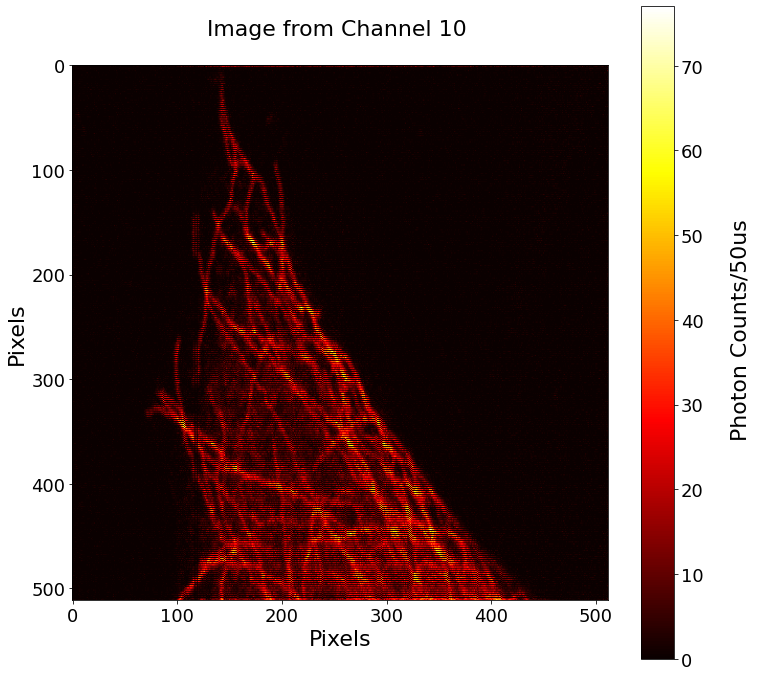

In [11]:
channel=10
ch=channel-1
# 3D dataset
data_3d_channel_10=image_4d[:,:,:,ch]
# x-y image
image_channel_10=data_3d_channel_10.sum(axis=2)

fig= plt.figure(figsize=(12,12))
plt.imshow(image_channel_10, cmap='hot')

cbar = plt.colorbar()
cbar.set_label('\n Photon Counts/'+str(dwell_time)+'us')
title('Image from Channel '+str(ch+1)+' \n')
xlabel('Pixels')
ylabel('Pixels')

In [12]:
table_channels[0]["arr_py"].max(),table_channels[0]["arr_px"].max()

(513, 1024)

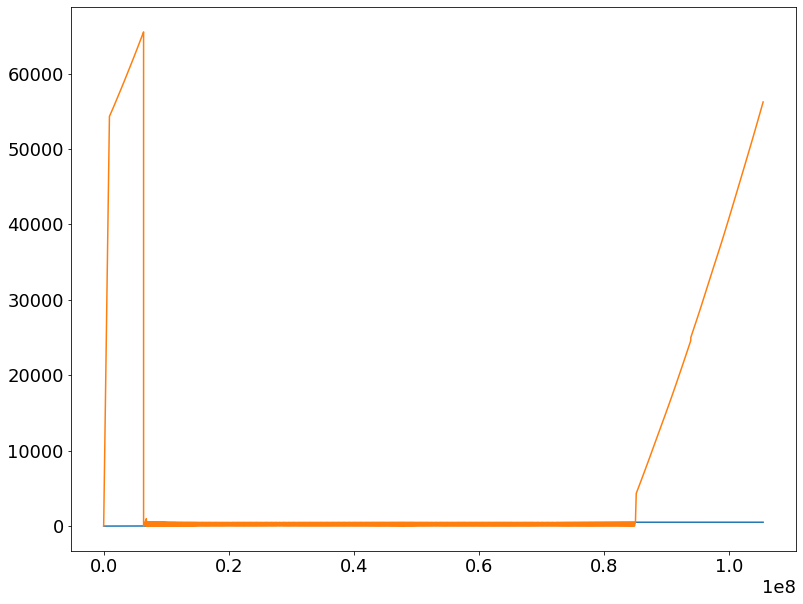

In [15]:
plot(table_channels[0]["arr_py"])
plot(table_channels[0]["arr_px_corr"])